# Default Prediction of Commercial Real Estate Properties
by Lucas Bleher and Adrian Scholl

# Outline
**1. Understanding the dataset and the business problem**

    1.1 Importing the datasets and merging all features and target variable into a dataframe

    1.2 Correlation analysis
        1.2.1 Correlation matrix
        1.2.2 Correlogram
        1.2.3 Boxplots for default and non-default
        
    1.3 Applying log-transformation to skewed features

    1.4 Define target and feature variables

    1.5 Dropping correlated features from feature array X

    1.6 General Approach on the following ML methods

**2. Logistic regression**

    2.1 Feature selection
     
    2.2 Imbalanced Prediction: Logistic Regression on the dataset with orginal class distribution
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    2.3 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    2.4 Balanced Prediction: Undersampling the majority class
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction


**3. Support Vector Machines**

    3.1 Imbalanced Prediction: SVM on the dataset with orginal class distribution
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    3.2 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    3.3 Balanced Prediction: Undersampling the majority class
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

**4. Random Forest**

    4.1 Unbalanced
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    4.2 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

    4.3 Balanced Prediction: Undersampling the majority class
        2.3.1 GridSearch for hyperparameter selection
        2.3.2 Testing/Prediction

**5. Conclusion**

    5.1 Logistic Regression

    5.2 Support Vector Machines

    5.3 Random Forest

    5.4 Model Recommendation


# 1. Understanding the dataset and the business problem

The goal of this project is to perform default prediction for commercial real estate property loans based on 17 variables (see also 1.1.1). The data originally was collected from four data sources: the
National Council of Real Estate Investment Fiduciaries
(NCREIF), Trepp, the Splitwise Blog, and the Federal Reserve Bank of St. Louis. For the assignment our teacher provided us with two matlab files. One containing all defaulted observations, the other one containing the non-defaulted loans. The following analysis is based on these two files. We are going to apply Logisitic Regression, Support Vector Maschines and Random Forests to the problem in order to develop a model which is able to classify unknown observations. This is very useful as the model will be able to provide a predication wheter a loan will default or not in the future.

In [ ]:
from scipy.io import loadmat
import pandas as pd
import io 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive 
drive.mount('/content/drive/')

pd.set_option("display.max_rows", 1000)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1.1 Importing the datasets and merging all features and target variable into a dataframe

In [ ]:
# Import matlab files
mat = loadmat("/content/drive/My Drive/Colab Notebooks/Project: Intro to ML/Datasets/LOSS.mat")
loss = mat["LOSS"]
loss = pd.DataFrame(loss)
# loss.info()
# loss.head()

In [ ]:
# Import matlab files
mat = loadmat("/content/drive/My Drive/Colab Notebooks/Project: Intro to ML/Datasets/PAY.mat")
pay = mat["PAY"]
pay = pd.DataFrame(pay)
# pay.info()
# pay.head()

In [ ]:
# add column to each dataset: 
  # PAY = 0, if loan wasn't payed back
  # PAY = 1, if loan was payed back
pay["PAY"] = 1
loss["PAY"] = 0
# Concat loss and pay dataset
data = pd.concat((pay, loss))
# data.info()
# data.head()

### 1.1.1 Identifying variables and renaming columns


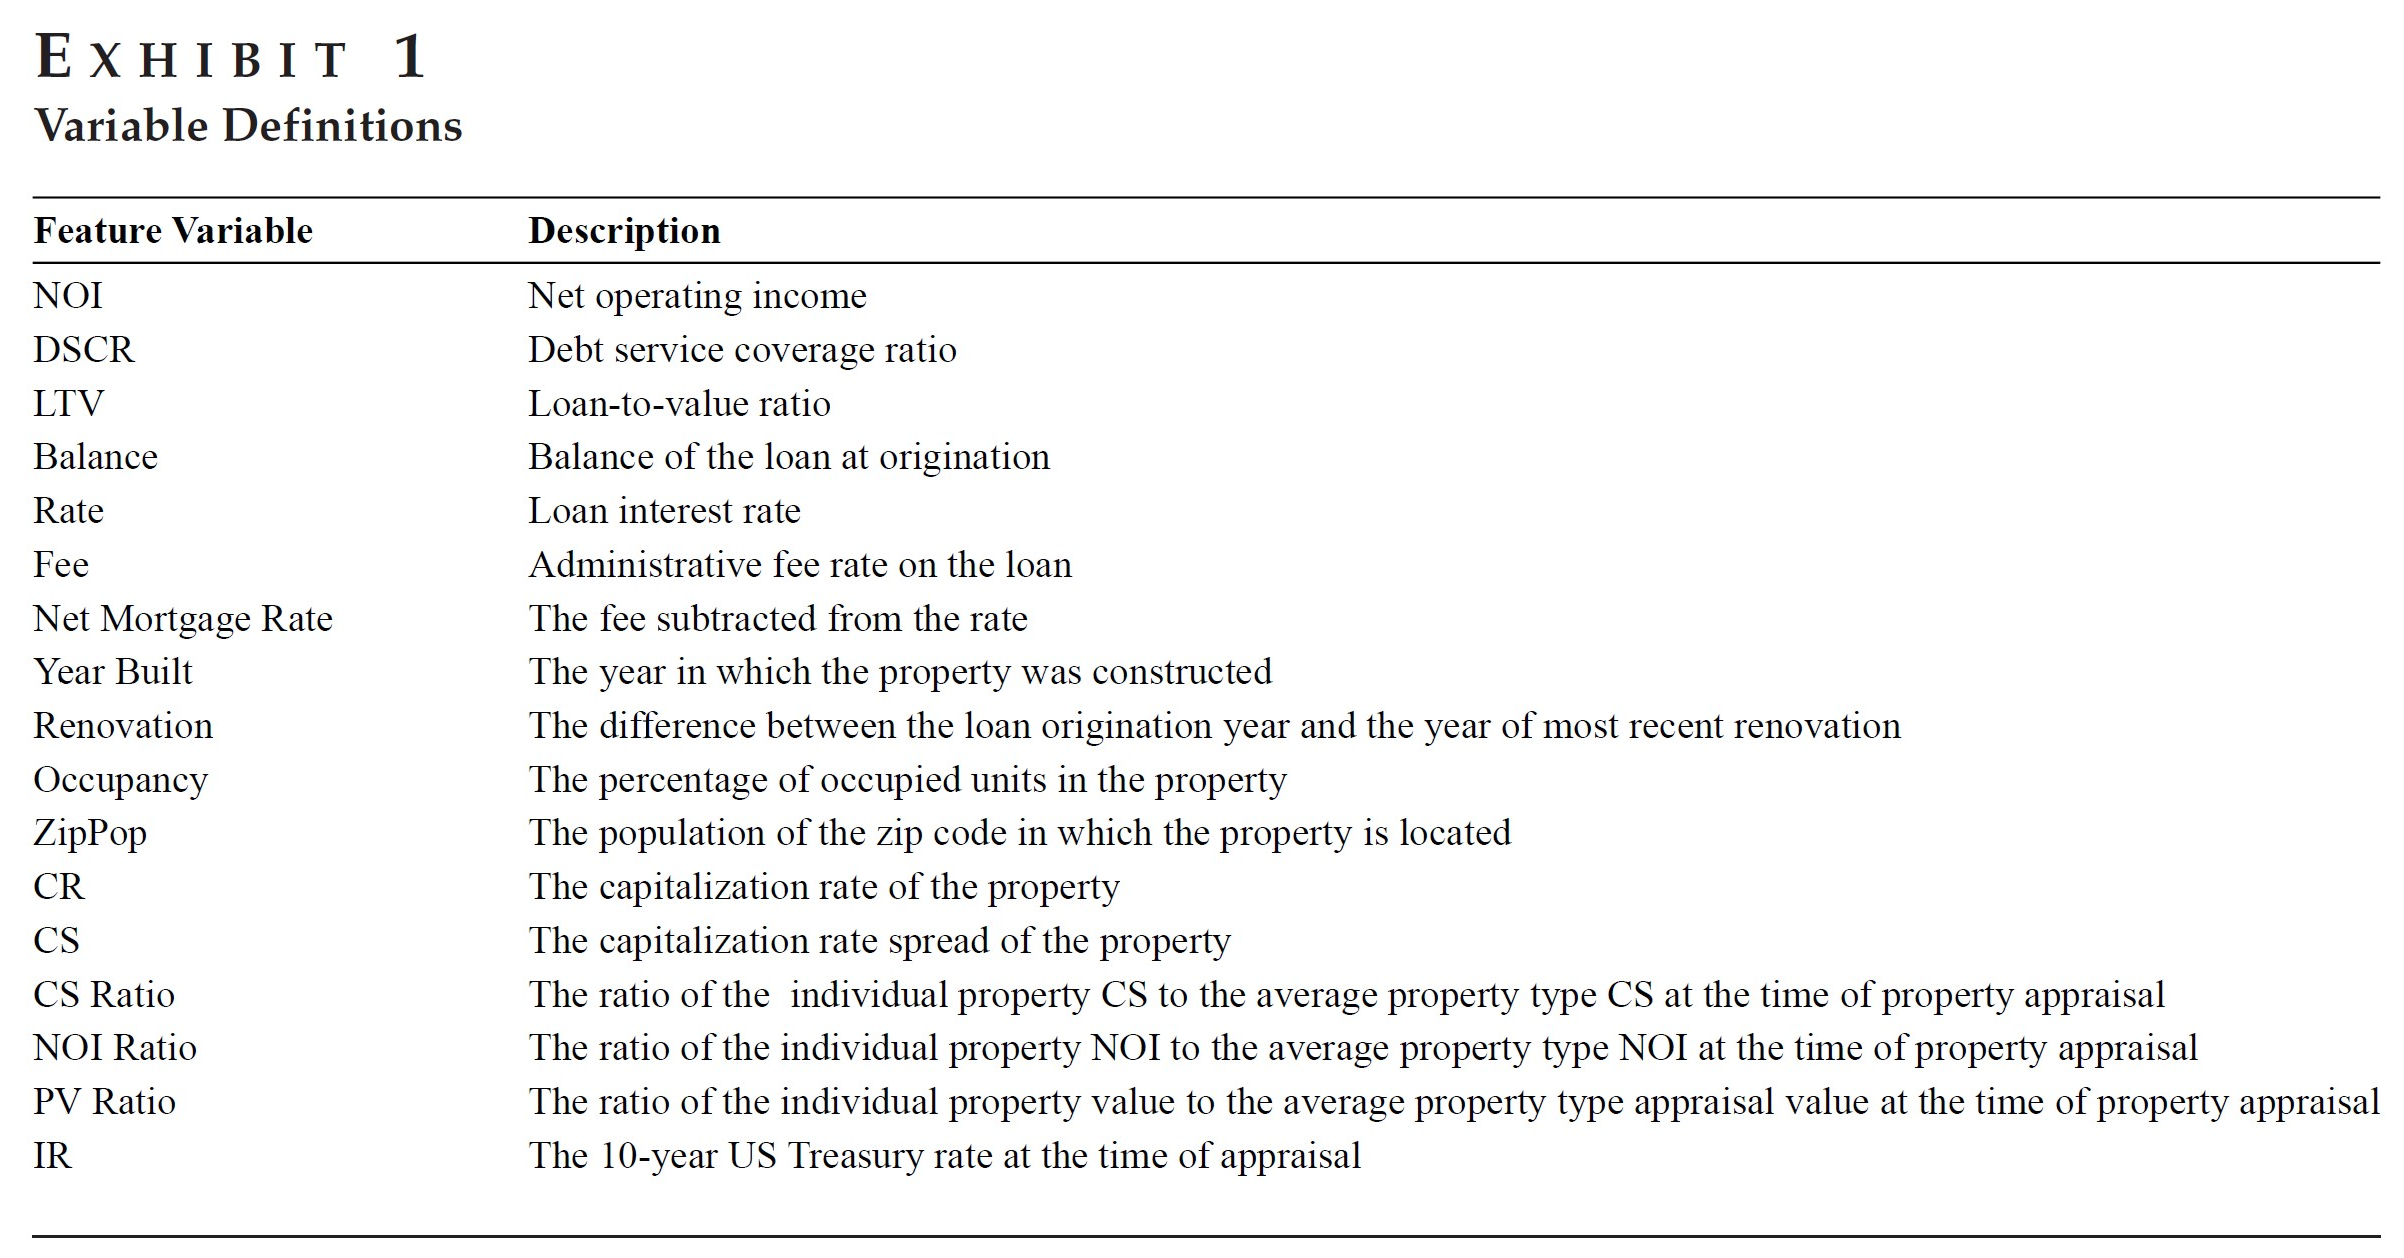

In [ ]:
data.columns = ["NOI", "DSCR", "LTV", "Balance", "Rate", "Fee", "Net Mortgage Rate", "Renovation", "Year Built", "Occupancy", "ZipPop", "CR", "CS", "CS Ratio", "NOI Ratio", "PV Ratio", "IR", "PAY"]
data.head()

NOI  DSCR   LTV    Balance  ...  NOI Ratio  PV Ratio    IR  PAY
0  601087.0  1.73  41.8  5800000.0  ...   0.423695  0.577329   4.0    1
1  352982.0  1.30  60.1  3200000.0  ...   0.090875  0.066759   6.0    1
2  489518.0  1.87  36.9  3100000.0  ...   0.345052  0.351724   6.0    1
3  464180.0  1.40  65.4  5100000.0  ...   0.209496  0.154483   1.0    1
4  576244.0  1.26  61.5  6600000.0  ...   0.260073  0.217952  26.0    1

[5 rows x 18 columns]

## 1.2 Correlation analysis

### 1.2.1 Correlation matrix
- we see that most of the variables are very little pairwise correlated
- but there are 10 cells with a correlation from r=0.77 to r=0.99 indicating that some of the features seem to be dependent:
  - Group 1:
    - **Net Mortgage Rate and Rate:** r=0.99
    - **CS Ratio and Rate:** r=0.78
    - **CS Ratio and Net Mortgage Rate**: r=0.77

  - Group 2:
      - **CR and ZipPop:** r=0.96

  - Group 3:
    - **Balance and NOI:** r=0.90
    - **NOI Ratio and NOI:** r=0.94
    - **NOI Ratio and Balance:** r=0.84
    - **PV Ratio and NOI:** r=0.94
    - **PV Ratio and Balance:** r=0.87
    - **PV Ratio and NOI Ratio:** r=0.95
- 1 or more features of every group might be eliminated later to prevent multicollinearity and reduce dimensions as they seem to explain roughly the same subject

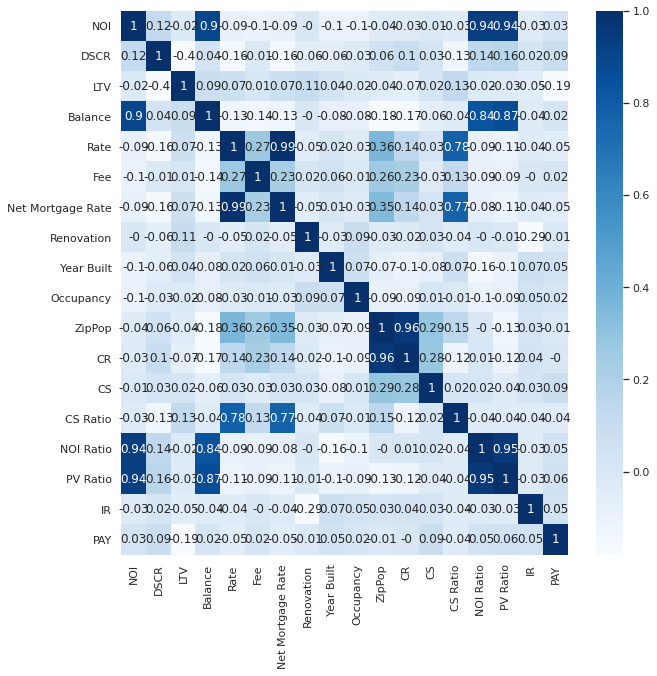

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
r_all = data.corr().round(decimals = 2)
#print(r_all)
#sns.heatmap(r_all, cmap="Blues", vmax = 0.8, vmin = 0.2, annot = True)
sns.heatmap(r_all, cmap="Blues", robust=True, annot = True)

### 1.2.2 Correlogram
(click on the ouput to zoom into the correlogram) 
- the correlogram gives us additional insights on the bivariate, pairwise relations between the features and their distribution


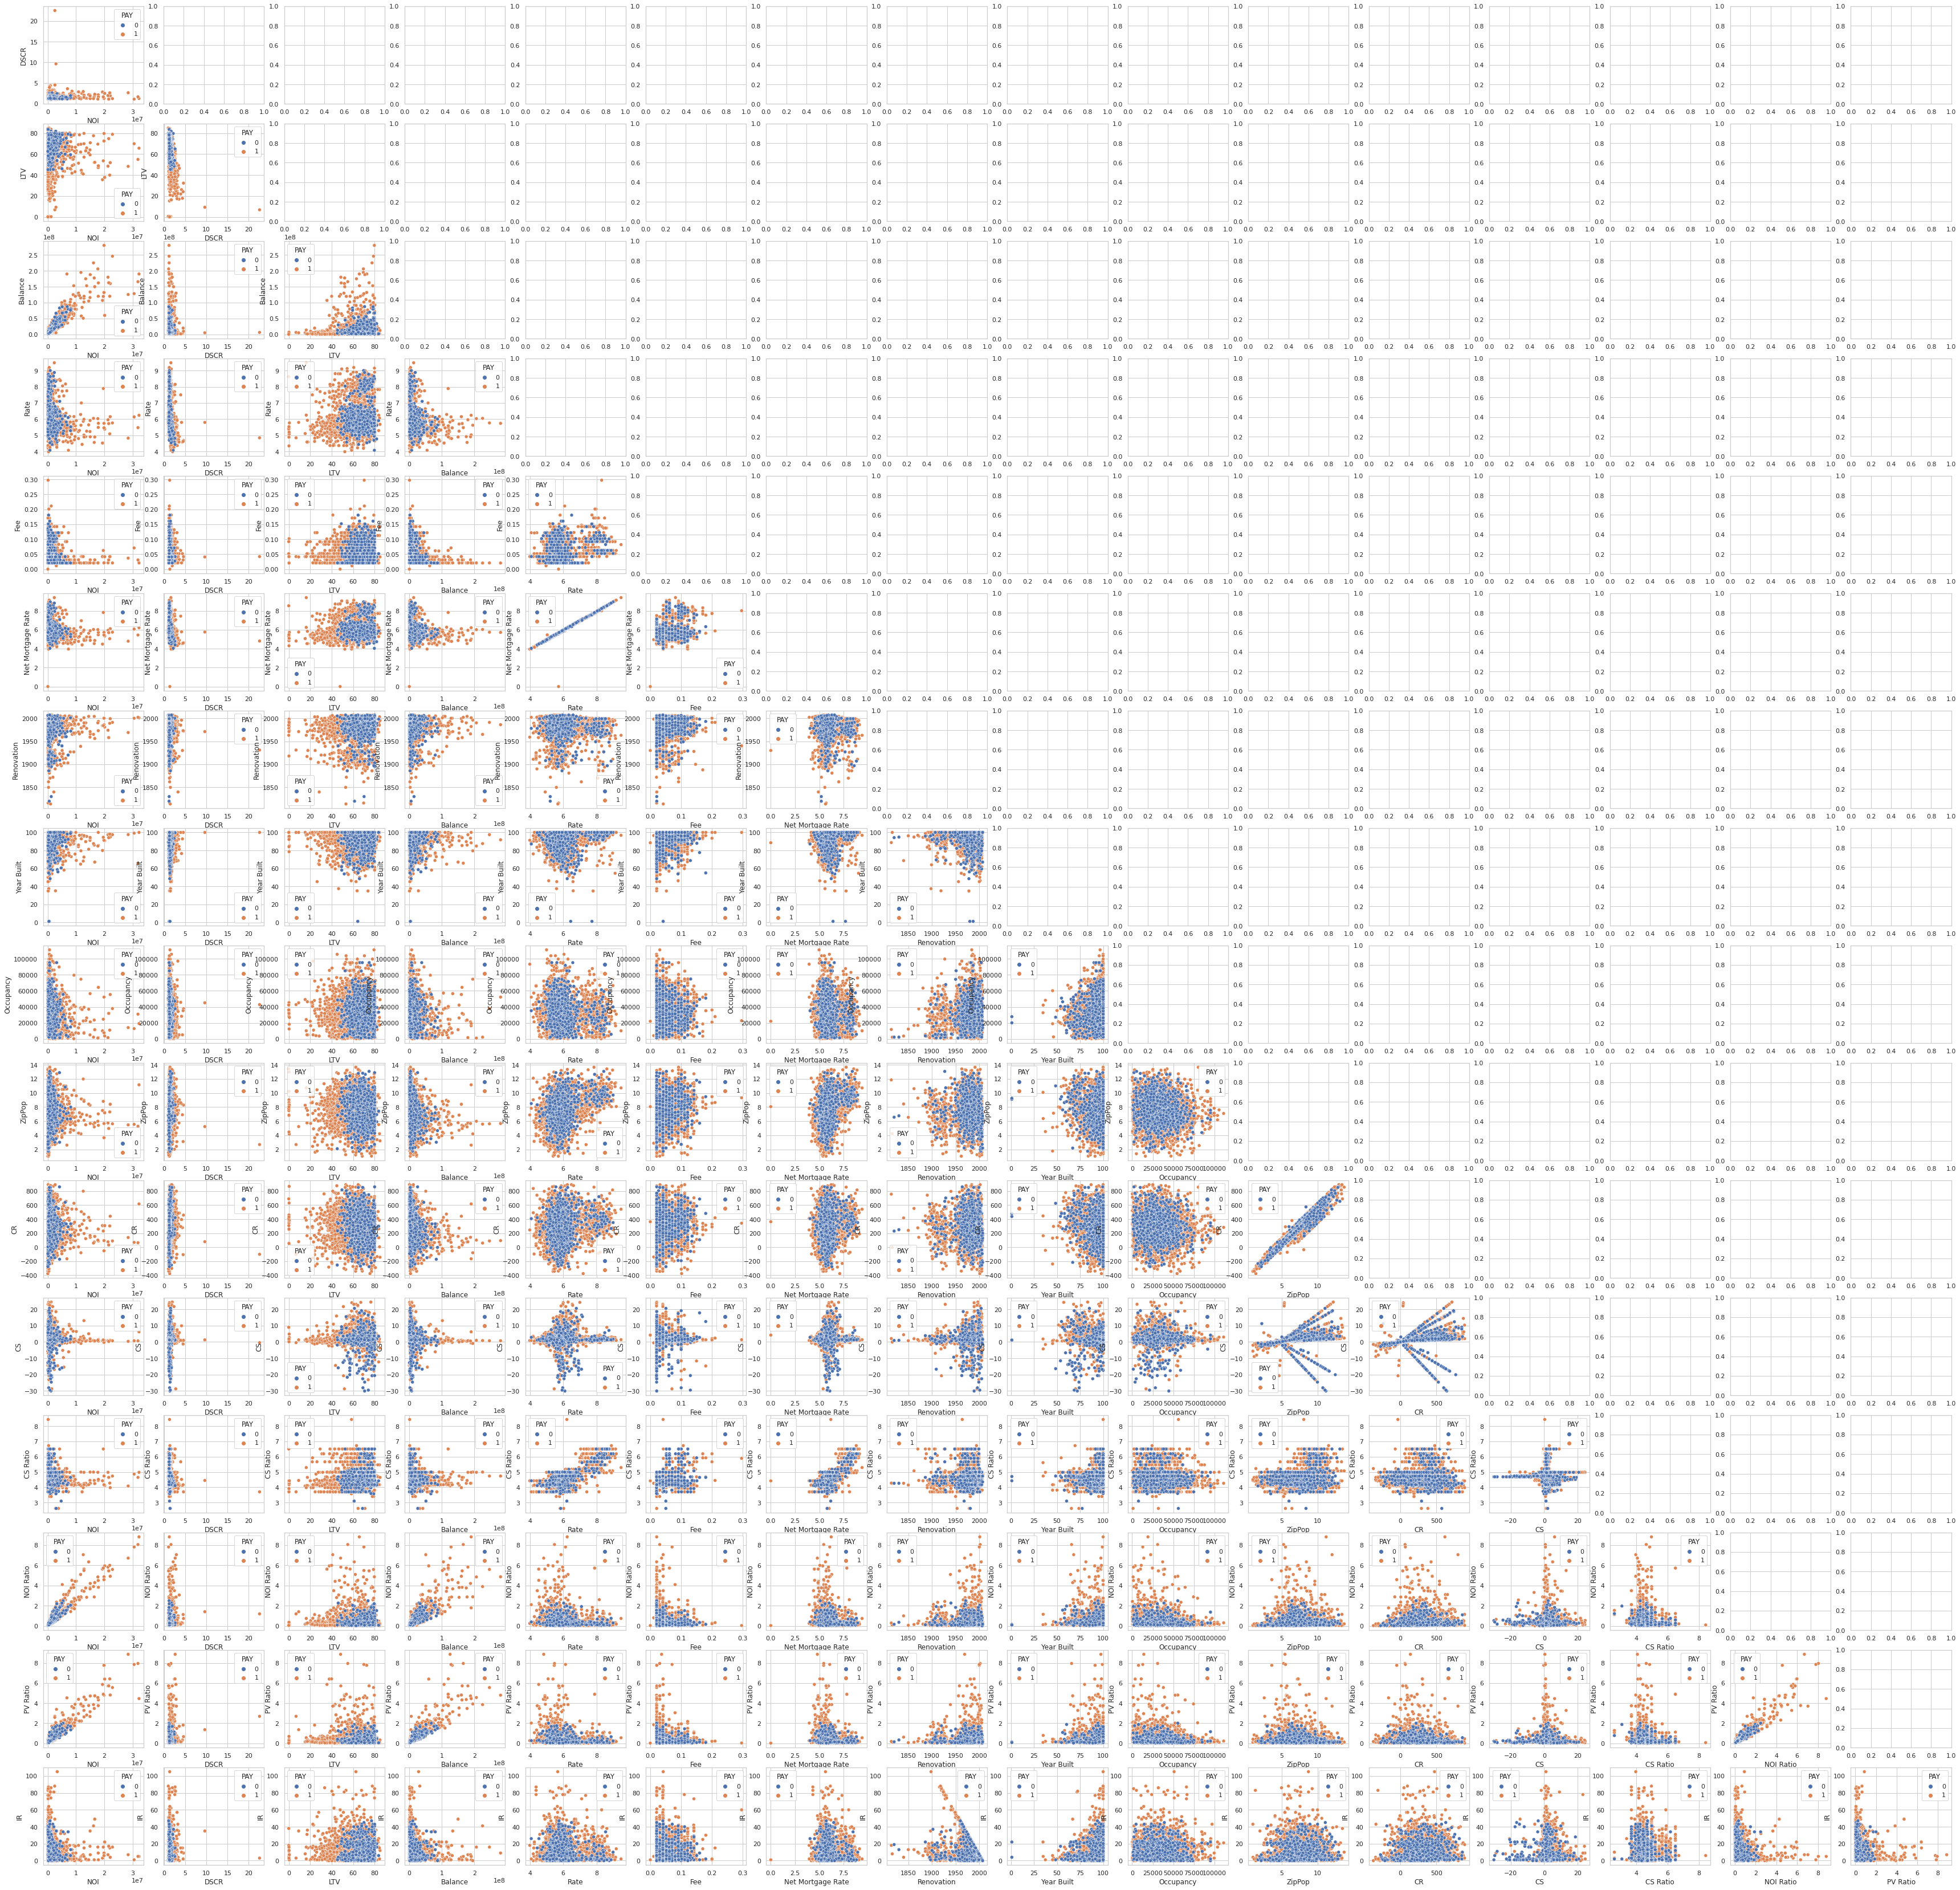

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(16, 16, figsize=(60, 60))

for i in range(0, 17):
  for j in range(0, i):
    # print(i, j)
    sns.scatterplot(x=data.iloc[:, j],y=data.iloc[:, i], hue=data["PAY"], ax=ax[i-1, j])


### 1.2.3 Boxplots for visualizing distribution of non-default 0 and default 1 for every variable
- many distributions seem to be skewed

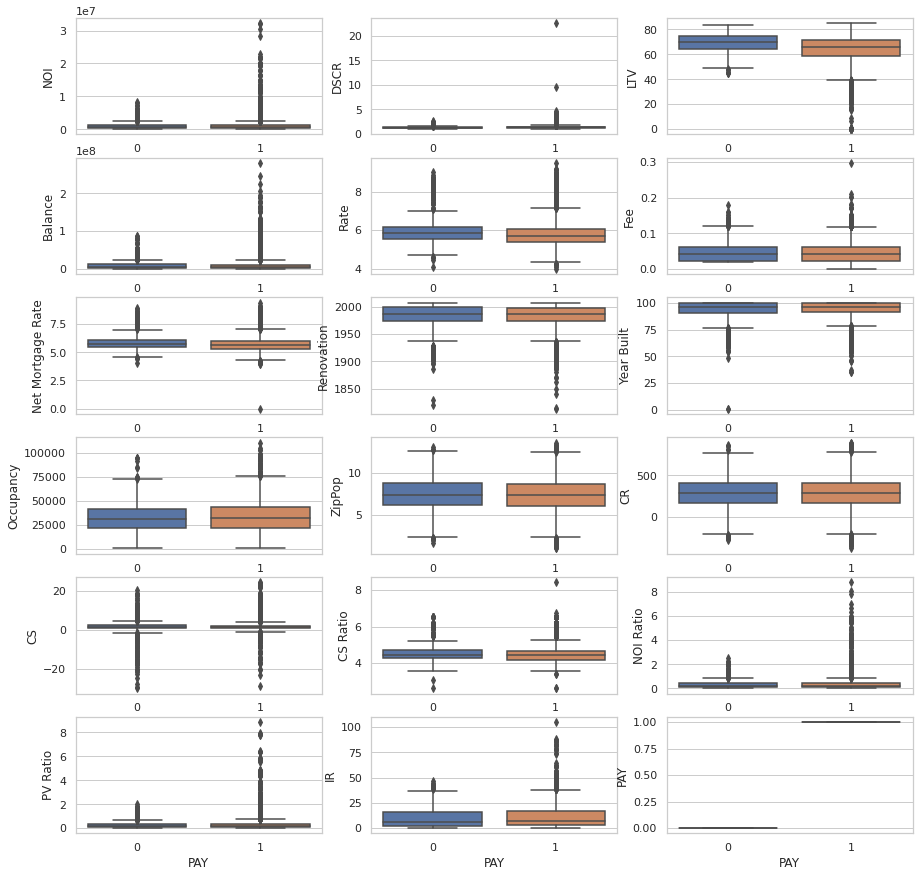

In [ ]:
# with regression
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
# sns.pairplot(data[["PAY", "NOI", "LTV", "CS"]], kind="scatter")
# print(ax)
ax = ax.ravel()
# print(ax)
for i in range(0, 18):
  # print(data.columns.values[i])
  col = data.columns.values[i]
  # ax[i].boxplot(data[[col]], labels=data["PAY"])
  sns.boxplot(x=data["PAY"], y = data[col], ax=ax[i]) 


CS Ratio, Renovation, CS were found the most important fetaures in the paper.

**Here** 
variables with significantly distinct distributions for default/non-default are:
- NOI
- DSCR
- LTV
- Balance
- NOI Ratio
- PV Ratio
- IR
 


## 1.3 Applying log transformations and comparing results
- the log-transformation helps to normalize the right-skewed distriutions
- this transformation might help to increase the prediction power of our independent variables

In [ ]:
#@title
data["log(Balance)"] = np.log(data["Balance"])
data["log(NOI)"] = np.log(data["NOI"])
data["log(DSCR)"] = np.log(data["DSCR"])
data["log(PV Ratio)"] = np.log(data["PV Ratio"])
data["log(NOI Ratio)"] = np.log(data["NOI Ratio"])

NameError: ignored

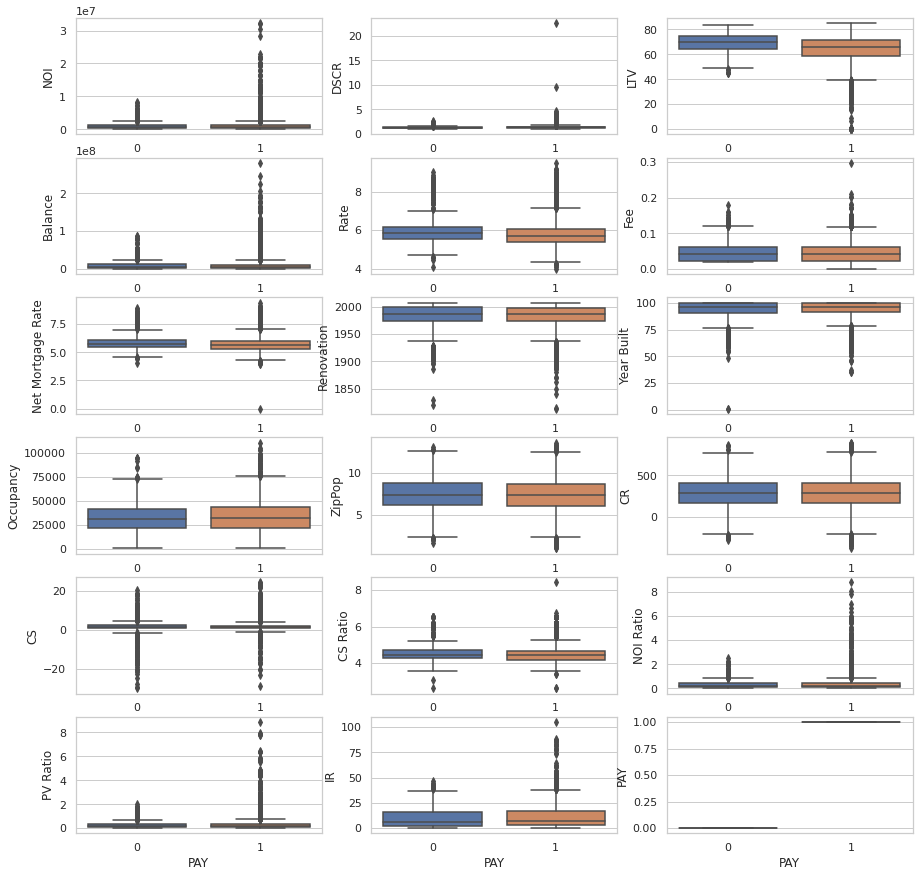

In [ ]:
#@title
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
# sns.pairplot(data[["PAY", "NOI", "LTV", "CS"]], kind="scatter")
# print(ax)
ax = ax.ravel()
# print(ax)
for i in range(0, 18):
  # print(data.columns.values[i])
  col = data.columns.values[i]
  # ax[i].boxplot(data[[col]], labels=data["PAY"])
  sns.boxplot(x=data["PAY"], y = data[col], ax=ax[i]) 


## 1.4 Define target and feature variables

We define our features as array X with the following shape: (4793, 17). Our target vector with 4793 rows and 1 column is y. This notation is going to be used for the following models.

In [ ]:
# Save features X and target y into array
X = data.iloc[:,0:17].to_numpy()
y = data.iloc[:,17:18].to_numpy()

# Transform X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshpae y
y_1d = y.flatten()
# print(y_1d)

Furthermore we define a undersampled and therefore balanced dataset. There are 969 loans represented in the original data set that defaulted. For this reason, we draw a sample of 969 observations from the 3823 non-default loans. Thus, we obtain a fully balanced dataset with a total of 1938 observations. 

In [ ]:
# draw subset vom non-default observations
pay_reduced = pay.sample(968, random_state= 99)
pay_reduced.info()
data_under = pd.concat((pay_reduced, loss))
X_under = data_under.iloc[:,0:17].to_numpy()
y_under = data_under.iloc[:,17:18].to_numpy()

# from imblearn.under_sampling import RandomUnderSampler
# under = RandomUnderSampler()
# X_res, y_res = under.fit_resample(X, y)

print("\n")
print(X_under.shape)
print(y_under.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 1823 to 206
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       968 non-null    float64
 1   1       968 non-null    float64
 2   2       968 non-null    float64
 3   3       968 non-null    float64
 4   4       968 non-null    float64
 5   5       968 non-null    float64
 6   6       968 non-null    float64
 7   7       968 non-null    float64
 8   8       968 non-null    float64
 9   9       968 non-null    float64
 10  10      968 non-null    float64
 11  11      968 non-null    float64
 12  12      968 non-null    float64
 13  13      968 non-null    float64
 14  14      968 non-null    float64
 15  15      968 non-null    float64
 16  16      968 non-null    float64
 17  PAY     968 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 143.7 KB


(1937, 17)
(1937, 1)


SMOTE under sampling is not be done in advance for all 3 ML models because only the train set should be oversampled.

## 1.5 Dropping correlated features from feature array X

In the following code block we remove highly correlated features. The resulting new feature array "X_dropped" contains 13 columns. This means that 4 features and the target have been removed. 

We compared the models with X and X_dropped. However, we came to the conclusion that X_dropped does not lead to any improvement, since we have "only" 17 features in our data set (see 2.1 Feature elimination). Therefore X_dropped is NOT going to be used for the following models.


In [ ]:
#@title
# Dropping correlated features
correlated_features = set()
r_all = data.corr().round(decimals = 2)
correlation_matrix = r_all.drop('PAY', axis=1) #remove target Varibale for this operation!

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

# Dropping the features from dataset
data.info()
data_dropped = data.drop(correlated_features, axis = 1)
data_dropped.info()

X_dropped = data_dropped.drop(["PAY"], axis=1).to_numpy()
y_dropped = data_dropped["PAY"].to_numpy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 968
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NOI                4793 non-null   float64
 1   DSCR               4793 non-null   float64
 2   LTV                4793 non-null   float64
 3   Balance            4793 non-null   float64
 4   Rate               4793 non-null   float64
 5   Fee                4793 non-null   float64
 6   Net Mortgage Rate  4793 non-null   float64
 7   Renovation         4793 non-null   float64
 8   Year Built         4793 non-null   float64
 9   Occupancy          4793 non-null   float64
 10  ZipPop             4793 non-null   float64
 11  CR                 4793 non-null   float64
 12  CS                 4793 non-null   float64
 13  CS Ratio           4793 non-null   float64
 14  NOI Ratio          4793 non-null   float64
 15  PV Ratio           4793 non-null   float64
 16  IR                 4793 n

## 1.6 General Approach on the following three ML methods 

The project was characterized by the problem of unbalanced data. Since this is very relevant for all 3 machine learning algorithms we applied, we will briefly describe our general approach here.
In our initial attempts, all 3 models coped very poorly with the fact that about 80% of the loans were labeled as non-default and only about 20% of the loans were labeled as default. Without measures against the imbalance, all 3 algorithms always predicted only the majority class.  

Therefore, we tried the following approaches and variants:

1) **Prediction on unbalanced data with adjusted class weights during the training process: **
The keyword "class weights" changes the weighting of the individual classes and thus weights the minority class more heavily. The exact implementation can be found in the individual sections and hyperparameter descriptions.

**2) Prediction on unbalanced data with oversampled training data (SMOTE): **
A diffrent approach for handling the issue of the imbalanced dataset is oversampling the training data. The goal is to oversample the minority class by creating synthetic observations with SMOTE ( Synthetic Minority Over-sampling Technique) from imblearn. Basically SMOTE creates artificiel observations by selecting nearby examples in the feature space. Then a line between the examples in the feature space is drawn and a new sample at a point along that line is chosen.

Note: We train on a balanced dataset (see SMOTE) but we still predict on a test set with the imbalanced class distribution from the ogrinal dataset in order to keep the prediction process realisitc. In addition oversampling the whole dataset is problematic as artificially created datapoints by SMOTE may appear in train and test set and would lead to massiv overfitting and wrong results.

**3) Prediction on balanced data via undersampling: **
The third approach is to build the model on a balanced subset of the orginial imbalanced dataset. There are 969 loans represented in the original data set that defaulted. For this reason, we draw a sample of 969 observations from the 3823 non-default loans. Thus, we obtain a fully balanced dataset with a total of 1938 observations.

In contrast to Section 2.1 and 2.2, here training AND prediction are based on a balanced dataset.

X_under and y_under were defined once above in section 1.4.




# 2. Logistic Regression

In this section we are going to build our first machine learning model, the logistic regression. The hyperparameters are here defined and explained once in order to better understand the following tuning process with GridSearchCV from sklearn. As mentioned in 1.6 we mainly focuse on three diffrent approaches to obtain the best model and prediction power. For every new approach the hyperparameters need to be tuned again. "We need to set hyperparameters before we train the models. Hyperparameters are very critical in building robust and accurate models. They help us find the balance between bias and variance and thus, prevent the model from overfitting or underfitting." (https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167)

Our approach for hyperparamter tuning was as follows:

1) First, we use a pipeline in which the data is standardized and in which a LogisticRegression() instance is created.

2) We specify a dictionnary "parameters" with possible hyperparamters. The individual parameters have the following influence:
- **C** is the inverse of the of regularization strength, where a smaller value indicates a stronger regularization. Regularization is a technique to make a model more generalizable and transferable, in other words to prevent overfitting.
- **class_weight**: The “balanced” keyword leads to an automatic adjustment of the class weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). This was necessary because our first logistic regression model on the unbalanced data simply classified all classes as non-default. Using the keywords, the underrepresented class is considered more during the fit. This already alludes to the issue of unbalanced data, which has been a major challenge for us throughout the project (more on this later). Using class weights with Logistic Regression is also know as Weighted Logistic Regression (see 2.2).
- **penalty**: This keyword is used to specify the penalty used in the course of regularization. L1 is able to reduce coefficients completely to zero, while L2 only corrects the value of the coefficients downwards. 
- **fit_intercept**: Specifies whether a constant (a.k.a. bias or intercept) should be added to the decision function

3) We instantiate a GridSearchCV object to which we pass the previously defined pipeline. It is important that we set the maximized scoring manually. For example, optimizing the accurracy in the case of an imbalanced dataset would not be a good approach. Therefore, we choose the ROC curve that is more suitable here.

4) We fit our model on the train set. The GriedSearchCV instance uses cross-validation to identify the best hyperparamters for our model. The predict method of the instance then uses the tuned model for prediction on the test data. 

5) We compute several metrics for our prediction using the test data. 

## 2.1 Feature Selection

Before training our logistic regression model, we conduct a recursive feature elimination to identify possibly relevant and irrelevant features. We apply the feature selection on an untuned basemodel to get a first impression of the explanatory power of the features. Later during the fitting and tuning of the logistic regression model we are using the L1 & L2 penalty terms for regularization purposes anyway. The recursive feature elimination starts with a full model containing all feature variables. Then in every step the least important feature is eliminated from the (sub)set of features and a score for the new model is calculated using the mean of a 5-fold cross validation.  


In [ ]:
# Import modules
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# reshpae y
y_1d = y.flatten()
# print(y_1d)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = 99, stratify=y_1d) 

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Instantiate Estimator
logReg = LogisticRegression(class_weight = "balanced")

selector = RFECV(logReg, step=1, cv=5, scoring="roc_auc") # selection result depends on selected metric 
selector = selector.fit(X_train, y_train)
print("\nWhich variables should be selected? ", selector.support_)
print("\nRanking of the variables: ", selector.ranking_)
print("\nGrid search scores: ", selector.grid_scores_)

# print(selector.get_params())

# # Predict on test set
y_pred = selector.predict(X_test)

#Evaluate
score = selector.score(X_test, y_test)
# print(score)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


Which variables should be selected?  [False  True  True  True  True False  True False  True False False False
  True False  True  True False]

Ranking of the variables:  [6 1 1 1 1 4 1 5 1 8 3 7 1 9 1 1 2]

Grid search scores:  [0.62697573 0.63365701 0.63760474 0.64278872 0.64278273 0.64730948
 0.65824535 0.65944617 0.65980377 0.65920944 0.65837066 0.65739336
 0.65716297 0.65717944 0.6570332  0.65748766 0.65750965]


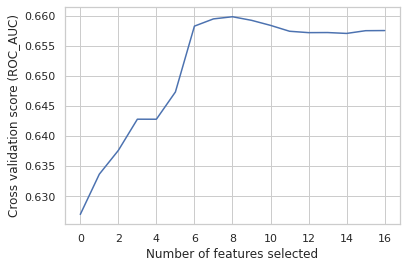

In [ ]:
# Plotting the number of features vs. cross-validation roc_auc scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (ROC_AUC)")
plt.plot(selector.grid_scores_)
plt.show()

**Result of the Recursive Feature Elimination:**
It seems that a susbset of 8 features is sufficient. Nevertheless, we start building the logistic regression model with all available features but add a L1/L2 regularization.

In [ ]:
# for col, selected, rank in data, selector.support_, selector.ranking_:
#   print(col, selected, rank)
  
# for col in range(0, 17):
  # print(data.columns[col], selector.ranking_[col], selector.support_[col])

print("\nSelected fetaures:")
for col in range(0, 17):
  if selector.support_[col] == True:
    print(data.columns[col])
    
print("\n Eliminated fetaures:")

for col in range(0, 17):
  if selector.support_[col] != True:
    print(data.columns[col])


Selected fetaures:
DSCR
LTV
Balance
Rate
Net Mortgage Rate
Year Built
CS
NOI Ratio
PV Ratio

 Eliminated fetaures:
NOI
Fee
Renovation
Occupancy
ZipPop
CR
CS Ratio
IR


## 2.2 Imbalanced Prediction: Logistic Regression on the dataset with orginal class distribution

In this abstract we perform logisitc regression on the orginial unbalanced data set. Approximately 20% of the observations are defaulted loans. The remaining 80% of the loans in the dataset were repaid (non-default). 
To avoid the model completely ignoring the underrepresented class during the training process, we use **balanced class weights** as described before. 

### 2.2.1 GridSearch for Hyperparameter selection

Accuracy: 0.7006863864196753
              precision    recall  f1-score   support

           0       0.30      0.70      0.42       291
           1       0.89      0.58      0.70      1147

    accuracy                           0.61      1438
   macro avg       0.59      0.64      0.56      1438
weighted avg       0.77      0.61      0.65      1438

Tuned Model Parameters: {'LogReg__C': 100, 'LogReg__class_weight': 'balanced', 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l2'}
[[204  87]
 [477 670]]
Total number of features: 17
Number of selected features: 17


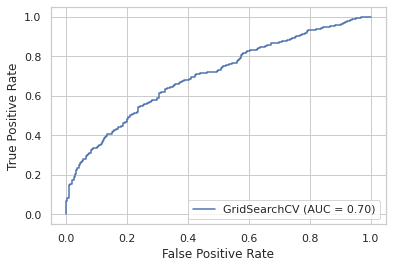

In [ ]:
# necesarry imports 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Set up steps for pipeline
steps = [("scaler", StandardScaler()),
          ("LogReg", LogisticRegression(solver='liblinear'))]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'LogReg__C': [0.001, 0.01, 0.1,1,10,100,1000],
              "LogReg__class_weight" : ["balanced"],
              "LogReg__penalty" : ['l1', "l2"],
              "LogReg__fit_intercept": [True, False]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, shuffle = True, random_state= 99)
gs_cv = GridSearchCV(pipeline, parameters, refit = "true" , scoring="roc_auc", cv = cross_validation, n_jobs= -1)

# reshpae y
y_1d = y.flatten()
# print(y_1d)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, stratify = y_1d, random_state = 99)

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

# Find the number of nonzero coefficients (selected features)
best_lr = gs_cv.best_estimator_
classifier = gs_cv.best_estimator_.named_steps['LogReg']
coefs = classifier.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# Plotting the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 



### 2.2.2 Testing /Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 2.2.1. The tuned model paramters are: {'LogReg__C': 100, 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l1'}. It is important to note that that the performance is depending on the split randomly determined by sklearns "train_test_split". Therefore it's a good idea to fit and predict several times with a diffrent split. Our worst AUC-score was 0.65, while the models best performance was 0.70.

                precision    recall  f1-score   support

           0       0.30      0.70      0.42       291
           1       0.89      0.59      0.70      1147

    accuracy                           0.61      1438
    macro avg      0.59      0.64      0.56      1438
    weighted avg   0.77      0.61      0.65      1438

For the evaluation we decided to use the "macro avg". This is the average of the score of class 0 and 1. We use "macro avg" instead of "weighted avg", since the latter overestimates the performance somewhat by weighting the majority class more heavily. In the following we will always handle it this way.


0.6084840055632823
              precision    recall  f1-score   support

           0       0.30      0.70      0.42       291
           1       0.89      0.59      0.70      1147

    accuracy                           0.61      1438
   macro avg       0.59      0.64      0.56      1438
weighted avg       0.77      0.61      0.65      1438

[[204  87]
 [476 671]]
(4793, 17)


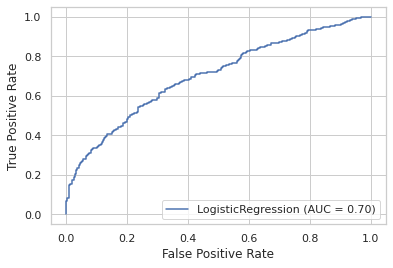

0.700674402370445

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate Estimator
logReg2 = LogisticRegression(C = 100, penalty= "l2", class_weight= "balanced", solver='liblinear')

# Fit to training set
logReg2.fit(X_train, y_train)

# Predict on test set
y_pred = logReg2.predict(X_test)

#Evaluate
score = logReg2.score(X_test, y_test)
print(score)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(X.shape)

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(logReg2, X_test, y_test)  
plt.show() 

from sklearn.metrics import roc_auc_score
y_score = logReg2.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)


In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  logReg2.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = logReg2.predict(X_test)

  # Compute and print metrics
  y_score = logReg2.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.650640996833215
ROC_AUC: 0.6828930693247288
ROC_AUC: 0.677197649927946
ROC_AUC: 0.6615764417560228
ROC_AUC: 0.6957639381982581
ROC_AUC: 0.6530258226300794
ROC_AUC: 0.6948561464690497
ROC_AUC: 0.6770478493125649
ROC_AUC: 0.6593923487837687
ROC_AUC: 0.6787435922786771
Mean roc_auc value for 10 random test datasets: 0.6731137855514311
Variance of roc_auc value for 10 random test datasets: 0.00023751842099494017


## 2.3 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set

Here we are going to try a diffrent approach for handling the issue of the imbalanced dataset. The goal is to oversample the minority class by creating synthetic observations with SMOTE ( Synthetic Minority Over-sampling Technique) from imblearn. For details please refer to 1.6 General Approach.



### 2.3.1 GridSearch for hyperparamter selection





The hyperparamter tuning procedure is very similar to the procedure described in 2.2.1, so please refer to the corresponding paragraph for details. 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.704820883404189
              precision    recall  f1-score   support

           0       0.31      0.70      0.43       291
           1       0.89      0.60      0.72      1147

    accuracy                           0.62      1438
   macro avg       0.60      0.65      0.57      1438
weighted avg       0.77      0.62      0.66      1438

Tuned Model Parameters: {'LogReg__C': 100, 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l2'}
[[203  88]
 [454 693]]
Total number of features: 17
Number of selected features: 17


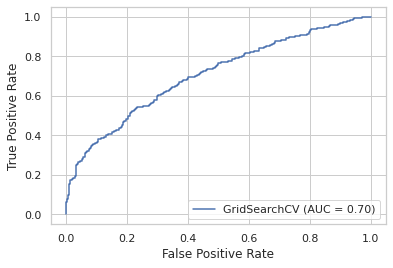

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

# reshpae y
y_1d = y.flatten()

# Standard Scaler improves from 0.51 to .68
scaler = StandardScaler()
X = scaler.fit_transform(X)

# # Oversampling
# oversample = SMOTE()
# X_res, y_res = oversample.fit_resample(X_dropped, y_1d)

# Set up steps for pipeline
steps = [("LogReg", LogisticRegression(solver="liblinear"))]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'LogReg__C': [0.001, 0.01, 0.1,1,10,100,1000],
              "LogReg__penalty" : ["l1", "l2"],
              "LogReg__fit_intercept": [True, False]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, shuffle = True, random_state= 99)
gs_cv = GridSearchCV(pipeline, parameters, refit = "true" , scoring="roc_auc", cv= cross_validation, n_jobs= -1)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size = 0.3, stratify = y_1d, random_state = 99)

# Oversampling the training data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Tuning process is commented out, because it runs for several minutes 

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

# Find the number of nonzero coefficients (selected features)
best_lr = gs_cv.best_estimator_
classifier = gs_cv.best_estimator_.named_steps['LogReg']
coefs = classifier.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 


### 2.3.2 Testing /Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 2.3.1. The tuned model paramters are: {'LogReg__C': 100, 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l2'}. 

Note: We still predict on test data that is imbalanced in order to maintain the situation realisitc. However, in this case we did some oversampling with SMOTE on the training data. 

The performance of this model is comparable to one obtained by weighted logistic regression from 2.2. Our worst AUC-score was 0.65, while the models best performance was 0.71.

              precision    recall  f1-score   support

           0       0.32      0.69      0.43       291
           1       0.89      0.63      0.73      1147

    accuracy                           0.64      1438
    macro avg      0.60      0.66      0.58      1438
    weighted avg   0.77      0.64      0.67      1438

Accuracy: 0.6376912378303199
              precision    recall  f1-score   support

           0       0.32      0.69      0.43       291
           1       0.89      0.63      0.73      1147

    accuracy                           0.64      1438
   macro avg       0.60      0.66      0.58      1438
weighted avg       0.77      0.64      0.67      1438

[[200  91]
 [430 717]]
Total number of features: 17
Number of selected features: 17


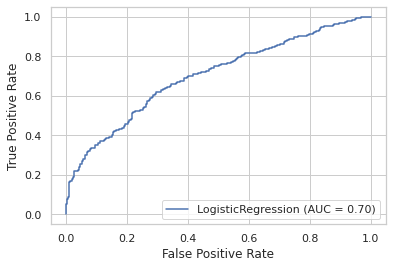

In [ ]:
# Instantiate model
logReg_tuned = LogisticRegression(solver="liblinear", penalty = 'l2', C = 100, fit_intercept = "True", max_iter= 1000)

# Oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# fit model
logReg_tuned.fit(X_train, y_train)

# predict labels
y_pred = logReg_tuned.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(logReg_tuned.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Find the number of nonzero coefficients (selected features)
coefs = logReg_tuned.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))


from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(logReg_tuned, X_test, y_test)  
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  logReg_tuned.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = logReg_tuned.predict(X_test)

  # Compute and print metrics
  y_score = logReg_tuned.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.650248519220917
ROC_AUC: 0.6841843506293124
ROC_AUC: 0.6778627646602371
ROC_AUC: 0.6631403601805996
ROC_AUC: 0.6966986940382351
ROC_AUC: 0.6542481956515878
ROC_AUC: 0.6946793817429002
ROC_AUC: 0.6776949879710106
ROC_AUC: 0.6602102601437486
ROC_AUC: 0.6775811395033211
Mean roc_auc value for 10 random test datasets: 0.6736548653741868
Variance of roc_auc value for 10 random test datasets: 0.00023491511225472687


## 2.4 Balanced Prediction: Undersampling the majority class

In this section we perform Logistic regression on a balanced subset of the orginial imbalanced dataset. There are 969 loans represented in the original data set that defaulted. For this reason, we draw a sample of 969 observations from the 3823 non-default loans. Thus, we obtain a fully balanced dataset with a total of 1938 observations. 

In contrast to Section 2.1 and 2.2,  here training AND prediction are based on a balanced dataset.

X_under and y_under were defined once above in section 1.4

### 2.4.1 GridSearch for hyperparamter selection

Accuracy: 0.6573611553949528
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       291
           1       0.65      0.51      0.57       291

    accuracy                           0.62       582
   macro avg       0.62      0.62      0.61       582
weighted avg       0.62      0.62      0.61       582

Tuned Model Parameters: {'LogReg__C': 0.1, 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l1'}
[[209  82]
 [142 149]]
Total number of features: 17
Number of selected features: 8


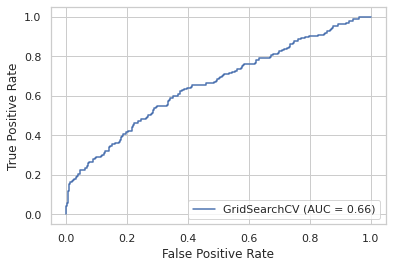

In [ ]:
#@title
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

# Set up steps for pipeline
steps = [("scaler", StandardScaler()),
          ("LogReg", LogisticRegression(solver='liblinear'))]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'LogReg__C': [0.001, 0.01, 0.1,1,10,100,1000],
              "LogReg__penalty" : ['l1', "l2"],
              "LogReg__fit_intercept": [True, False]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(pipeline, parameters, cv = cross_validation, refit = "true" , scoring="roc_auc", n_jobs= -1)

# reshpae y
y_under = y_under.flatten()
# print(y_1d)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, stratify = y_under, random_state = 99)

# Tuning process is commented out, because it runs for several minutes 

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

# Find the number of nonzero coefficients (selected features)
best_lr = gs_cv.best_estimator_
classifier = gs_cv.best_estimator_.named_steps['LogReg']
coefs = classifier.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 

### 2.4.2 Testing / Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 2.4.1. The tuned model paramters are: {'LogReg__C': 0.1, 'LogReg__fit_intercept': True, 'LogReg__penalty': 'l1'}. Our worst AUC-score was 0.63, while the models best performance was 0.69.

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       291
           1       0.63      0.55      0.59       291

    accuracy                           0.62       582
    macro avg      0.62      0.62      0.61       582
    weighted avg   0.62      0.62      0.61       582

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6151202749140894
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       291
           1       0.63      0.55      0.59       291

    accuracy                           0.62       582
   macro avg       0.62      0.62      0.61       582
weighted avg       0.62      0.62      0.61       582

[[198  93]
 [131 160]]


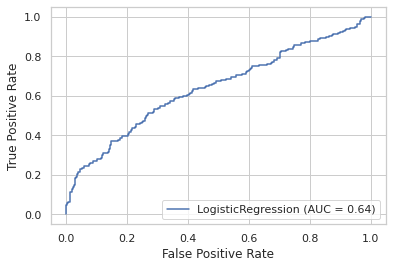

In [ ]:

# # Create train and test set
# X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, stratify = y_under) 

# Instantiate Estimator
logReg_final = LogisticRegression(C = 0.1, penalty= "l1", solver= "liblinear")

# Fit to training set
logReg_final.fit(X_train, y_train)

# Predict on test set
y_pred = logReg_final.predict(X_test)

#Evaluate
score = logReg_final.score(X_test, y_test)
print(score)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(logReg_final, X_test, y_test)  
plt.show() 

Surprisingly, the performance on the artificially balanced data set is not better, tending to be slightly worse.

This may be due to the significant reduction in observations due to undersampling. 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)

# reshpae y
y_under = y_under.flatten()

for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = i, stratify=y_under)

  # Fit to training set
  logReg_final.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = logReg_final.predict(X_test)

  # Compute and print metrics
  y_score = logReg_final.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6392343028542411
ROC_AUC: 0.6585538668650583
ROC_AUC: 0.6537830209846365
ROC_AUC: 0.6687568639954654
ROC_AUC: 0.6509488551150789
ROC_AUC: 0.6217569466586365
ROC_AUC: 0.6921151143704019
ROC_AUC: 0.639080785536307
ROC_AUC: 0.6231504115445022
ROC_AUC: 0.6482445885145427
Mean roc_auc value for 10 random test datasets: 0.6495624756438871
Variance of roc_auc value for 10 random test datasets: 0.0003968750153193554


# 3. Support Vector Machine

In this paragraph we are going to build the second machine learning model, the Support Vector Machines for classification. Again The hyperparameters are here defined and explained once in order to better understand the following tuning process with GridSearchCV from sklearn. The process of hyperparameter selection is the same as before. Please refer to the beginning of section two for more details.

We used the following hyperparameters for tuning our model:

- **C**: Regularization parameter where the strength of the regularization is inversely proportional to C (cf. Logisitc regression). It controls the impact of misclassification on the training process. Intuitively it specifies how many training points are allowed to be misclassified (soft margin vs. hard margin).
- **kernel**: Specifies the kernel type to be used in the algorithm. We tried the following kernels: linear, poly, rbf and sigmoid. However the default rbf setting outperformed other kernels. 
- **gamma**: This hyperparamter is only necesary when using the rbf kernel as we did. Gamma controlls the smoothness and the extent of curvature we want to see on our decision boundary. A large value of gamma of is problematic with regard to overfitting because the class regions get too specific. A lower gamma value often results in a more generalized model because the deciciosn boundary gets smoother. 

## 3.1 Imbalanced Prediction: SVM on the dataset with orginal class distribution





In this section we use sklearn's Support Vector Classifier (SVC) on the orginial unbalanced data set. Approximately 20% of the observations are defaulted loans. The remaining 80% of the loans in the dataset were repaid (non-default). 

### 3.1.1 GridSearch for Hyperparameter Selection

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  1.4min finished


Accuracy: 0.7010339238473591
              precision    recall  f1-score   support

           0       0.29      0.72      0.42       291
           1       0.89      0.56      0.68      1147

    accuracy                           0.59      1438
   macro avg       0.59      0.64      0.55      1438
weighted avg       0.77      0.59      0.63      1438

Tuned Model Parameters: {'SVC__C': 100, 'SVC__class_weight': 'balanced', 'SVC__gamma': 0.001}
[[210  81]
 [509 638]]


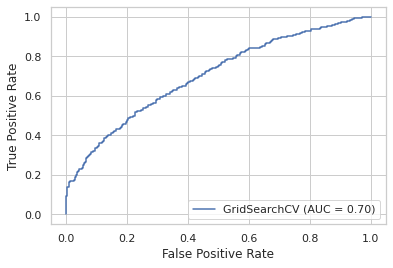

In [ ]:

!pip install imbalanced-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Standard Scaler improves from 0.51 to .68
scaler = StandardScaler()
X = scaler.fit_transform(X)

# reshape y
y = y.flatten()
  # print(y_1d)

steps = [("SVC", SVC())]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'SVC__C': [0.001, 0.01, 0.1,1,10,100,1000],
              'SVC__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              "SVC__class_weight" : ["balanced"]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(pipeline, parameters, cv = cross_validation, refit = "true" , scoring="roc_auc", verbose =3, n_jobs= -1)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99, stratify = y_1d)

# Tuning process is commented out, because it runs for several minutes 

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

#Plot ROC-curve
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 


### 3.1.2 Testing / Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 3.1.1. The tuned model paramters are: {'SVC__C': 100, 'SVC__class_weight': 'balanced', 'SVC__gamma': 0.001}. Our worst AUC-score was 0.67, while the models best performance was 0.70.

              precision    recall  f1-score   support

           0       0.29      0.72      0.42       291
           1       0.89      0.56      0.68      1147

    accuracy                           0.59      1438
    macro avg      0.59      0.64      0.55      1438
    weighted avg   0.77      0.59      0.63      1438

0.5897079276773296
              precision    recall  f1-score   support

           0       0.29      0.72      0.42       291
           1       0.89      0.56      0.68      1147

    accuracy                           0.59      1438
   macro avg       0.59      0.64      0.55      1438
weighted avg       0.77      0.59      0.63      1438

[[210  81]
 [509 638]]
(4793, 17)


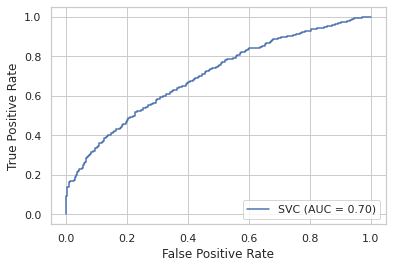

In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate Estimator
svc_tuned = SVC(C = 100, class_weight= "balanced", gamma= 0.001, probability= True)

# Fit to training set
svc_tuned.fit(X_train, y_train)

# Predict on test set
y_pred = svc_tuned.predict(X_test)

#Evaluate
score = svc_tuned.score(X_test, y_test)
print(score)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(X.shape)

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(svc_tuned, X_test, y_test)  
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  svc_tuned.fit(X_train, y_train)

  # Predict labels of test set
  y_pred =  svc_tuned.predict(X_test)

  # Compute and print metrics
  y_score =  svc_tuned.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6740368569434083
ROC_AUC: 0.6903171878230075
ROC_AUC: 0.6778298085248534
ROC_AUC: 0.6627418905436864
ROC_AUC: 0.6976064857674436
ROC_AUC: 0.6651656645005497
ROC_AUC: 0.7062200211518468
ROC_AUC: 0.6904190522414666
ROC_AUC: 0.6724250023219096
ROC_AUC: 0.6955751894228781
Mean roc_auc value for 10 random test datasets: 0.683233715924105
Variance of roc_auc value for 10 random test datasets: 0.00019660454509401467


## 3.2 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set
Here again the goal is to oversample the minority class by creating synthetic observations with SMOTE ( Synthetic Minority Over-sampling Technique) from imblearn. For details please refer to 1.6 General Approach.


### 3.2.1 GridSearch for hyperparamter selection

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  3.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.702621810370397
              precision    recall  f1-score   support

           0       0.30      0.75      0.43       291
           1       0.90      0.55      0.68      1147

    accuracy                           0.59      1438
   macro avg       0.60      0.65      0.56      1438
weighted avg       0.78      0.59      0.63      1438

Tuned Model Parameters: {'SVC__C': 100, 'SVC__gamma': 0.001}
[[218  73]
 [513 634]]


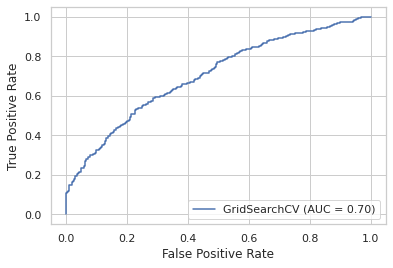

In [ ]:
!pip install imbalanced-learn
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # diffrent pipeline which does not resample vlaidation data automatically
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

# Standard Scaler improves from 0.51 to .68
scaler = StandardScaler()
#X_dropped = scaler.fit_transform(X_dropped)
X = scaler.fit_transform(X)


# reshape y
y_1d = y.flatten()

# Set up steps for pipeline
steps = [('sampling', SMOTE()),
         ("SVC", SVC(class_weight= "balanced"))]

pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'SVC__C': [0.001, 0.01, 0.1,1,10,100,1000],
              'SVC__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(pipeline, parameters, cv = cross_validation, refit = "true" , scoring="roc_auc", verbose =3, n_jobs= -1)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = 99,  stratify = y_1d)

# # Oversampling, only on the train set!!
# oversample = SMOTE()
# X_res, y_res = oversample.fit_resample(X_train, y_train)

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 

### 3.2.2 Testing / Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 3.2.1. The tuned model paramters are: {'SVC__C': 100, 'SVC__gamma': 0.001} Our worst AUC-score was 0.68, while the models best performance was 0.72.


              precision    recall  f1-score   support

           0       0.30      0.74      0.43       291
           1       0.90      0.56      0.69      1147

    accuracy                           0.60      1438
    macro avg      0.60      0.65      0.56      1438
    weighted avg   0.77      0.60      0.64      1438

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.5959666203059806
              precision    recall  f1-score   support

           0       0.30      0.74      0.43       291
           1       0.90      0.56      0.69      1147

    accuracy                           0.60      1438
   macro avg       0.60      0.65      0.56      1438
weighted avg       0.77      0.60      0.64      1438

[[216  75]
 [506 641]]


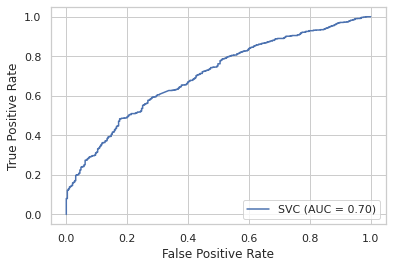

In [ ]:
# Instantiate
svc = SVC(C = 100, gamma= 0.001, probability= True)

y_1d = y.flatten()

# Oversampling, only on the train set!!
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train)

# Fit to training set
svc.fit(X_res, y_res)

# Predict labels of test set
y_pred = svc.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(svc.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(svc, X_test, y_test)  
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  svc.fit(X_res, y_res)

  # Predict labels of test set
  y_pred = svc.predict(X_test)

  # Compute and print metrics
  y_score = svc.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6945924973859793
ROC_AUC: 0.7131378135701382
ROC_AUC: 0.6976843820874417
ROC_AUC: 0.6914197203522112
ROC_AUC: 0.7107814498901961
ROC_AUC: 0.6777594022356244
ROC_AUC: 0.7109042863948085
ROC_AUC: 0.7047879272688052
ROC_AUC: 0.6819702975339823
ROC_AUC: 0.7123663404009264
Mean roc_auc value for 10 random test datasets: 0.6995404117120113
Variance of roc_auc value for 10 random test datasets: 0.00015094224070186468


## 3.3 Balanced Prediction: Undersampling the majority class

In this section we perform Support Vector Classification on a balanced subset of the orginial imbalanced dataset. As mentioned before there are 969 loans represented in the original data set that defaulted. For this reason, we draw a sample of 969 observations from the 3823 non-default loans. Thus, we obtain a fully balanced dataset with a total of 1938 observations. 

In contrast to Section 3.1 and 3.2,  here training AND prediction are based on a balanced dataset. That's why we called this section Balanced Prediction.


X_under and y_under were defined once above in section 1.4

### 3.3.1 GridSearch for hyperparamter selection

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   15.2s finished


Accuracy: 0.6644938061666726
              precision    recall  f1-score   support

           0       0.58      0.75      0.66       291
           1       0.65      0.46      0.54       291

    accuracy                           0.61       582
   macro avg       0.62      0.61      0.60       582
weighted avg       0.62      0.61      0.60       582

Tuned Model Parameters: {'SVC__C': 100, 'SVC__gamma': 0.001}
[[219  72]
 [156 135]]


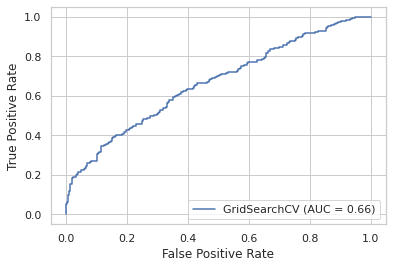

In [ ]:
# Standard Scaler improves from 0.51 to .68
scaler = StandardScaler()
X_under = scaler.fit_transform(X_under)

# reshape y
y_under = y_under.flatten()
  # print(y_1d)

# Set up steps for pipeline
steps = [("SVC", SVC())]

#Instantiate pipe
pipeline = Pipeline(steps)

# Specify possible hyperparameters 
parameters = {'SVC__C': [0.001, 0.01, 0.1,1,10,100,1000],
              'SVC__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              #"SVC__class_weight" : ["balanced"]
              }

# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(pipeline, parameters, cv = cross_validation, refit = "true" , scoring="roc_auc", verbose =3, n_jobs= -1)

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = 99, stratify = y_under)

# Tuning process is commented out, because it runs for several minutes 

# Fit to training set
gs_cv.fit(X_train, y_train)

# Predict labels of test set
y_pred = gs_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
print(confusion_matrix(y_test, y_pred))

#Plot ROC-curve
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(gs_cv, X_test, y_test)  
plt.show() 


### 3.3.2 Testing / Prediction of the tuned Model

We now fit our model with the tuned hyperparameters from 3.3.1. The tuned model paramters are: {'SVC__C': 1000, 'SVC__gamma': 0.001}. Our worst AUC-score was 0.65, while the models best performance was 0.70.



              precision    recall  f1-score   support

           0       0.59      0.71      0.64       291
           1       0.64      0.50      0.56       291

    accuracy                           0.61       582
    macro avg      0.61      0.61      0.60       582
    weighted avg   0.61      0.61      0.60       582

0.6065292096219931
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       291
           1       0.64      0.50      0.56       291

    accuracy                           0.61       582
   macro avg       0.61      0.61      0.60       582
weighted avg       0.61      0.61      0.60       582

[[208  83]
 [146 145]]
(4793, 17)


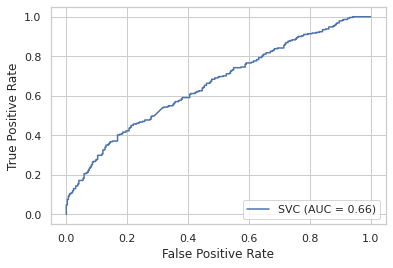

In [ ]:
# Instantiate Estimator
svc_tuned = SVC(C = 1000, gamma= 0.001, probability= True)

# Fit to training set
svc_tuned.fit(X_train, y_train)

# Predict on test set
y_pred = svc_tuned.predict(X_test)

#Evaluate
score = svc_tuned.score(X_test, y_test)
print(score)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(X.shape)

from sklearn import metrics
import matplotlib.pyplot as plt

metrics.plot_roc_curve(svc_tuned, X_test, y_test)  
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = i, stratify=y_under)

  # Fit to training set
  svc_tuned.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = svc_tuned.predict(X_test)

  # Compute and print metrics
  y_score = svc_tuned.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6527674448813784
ROC_AUC: 0.683966887495424
ROC_AUC: 0.6729372586530626
ROC_AUC: 0.6560503536802825
ROC_AUC: 0.6622973276177655
ROC_AUC: 0.6528973441503998
ROC_AUC: 0.6987872131883184
ROC_AUC: 0.6622619005443959
ROC_AUC: 0.6321134611069779
ROC_AUC: 0.6789244340525029
Mean roc_auc value for 10 random test datasets: 0.6653003625370508
Variance of roc_auc value for 10 random test datasets: 0.0003229838277957172


# 4. Random Forest

In this paragraph we are going to build the third machine learning model, the Random Forest Classifier. Again the hyperparameters are here defined and explained once in order to better understand the following tuning process with GridSearchCV from sklearn. The process of hyperparameter selection is the same as before. Please refer to the beginning of section 2 for more details.


We used the following hyperparameters for tuning our model:

  - **criterion**: the function to measure the quality of a split: either gini-index or entropy
  - **max_depth**: specifies the maximum allowed depth of a tree 
  - **n_estimators**: specifies the number of trees in the forest

## 4.1 Imbalanced Prediction: SVM on the dataset with orginal class distribution


In this section we use sklearn's Random Forest Classifier on the orginial unbalanced data set. Approximately 20% of the observations are defaulted loans. The remaining 80% of the loans in the dataset were repaid (non-default).


### 4.1.1 GridSearch for hyperparamter selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# necesarry imports 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

#Scaling the training data and test data independently
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Specify possible hyperparameters 
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[10,11,12],
    "n_estimators": np.arange(90, 200, 3) # when all numbers from 1 to 200 are searched we get the same result 
}
# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring="roc_auc", cv=cross_validation,  verbose=3, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train, y_train)

print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

Fitting 5 folds for each of 222 candidates, totalling 1110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1110 out of 1110 | elapsed: 20.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 177}


### 4.1.2 Testing/Prediction of the tuned model
We now fit our model with the tuned hyperparameters from 4.1.1.

The tuned model paramters are:

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 177}

---

Tested on 10 different random data splits, the worst AUC-score was **0.68** while the models best performance was **0.74**.

              precision    recall  f1-score   support

           0       0.37      0.32      0.34       291
           1       0.83      0.86      0.85      1147

    accuracy                           0.75      1438
   macro avg       0.60      0.59      0.60      1438
weighted avg       0.74      0.75      0.74      1438

[[ 94 197]
 [161 986]]


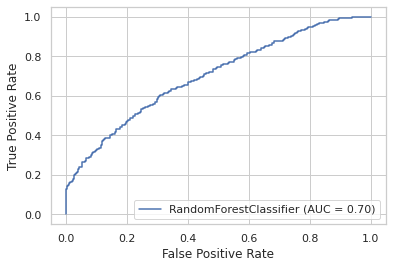

In [ ]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

#Scaling the training data and test data independently
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

from sklearn.metrics import plot_roc_curve, roc_auc_score
rf1 = RandomForestClassifier(criterion="entropy", max_depth=11, n_estimators= 145, class_weight="balanced")
rf1.fit(X_train, y_train.flatten())

# Predict labels of test set
y_pred = rf1.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plot_roc_curve(rf1, X_test, y_test) 
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  rf1.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = rf1.predict(X_test)

  # Compute and print metrics
  y_score = rf1.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6798161646848045
ROC_AUC: 0.7265509606713465
ROC_AUC: 0.6882978755276726
ROC_AUC: 0.6774073707894792
ROC_AUC: 0.6837948690293221
ROC_AUC: 0.6731530333126609
ROC_AUC: 0.7039190836995959
ROC_AUC: 0.7124067865670791
ROC_AUC: 0.6776740158848572
ROC_AUC: 0.7117296877855575
Mean roc_auc value for 10 random test datasets: 0.6934749847952376
Variance of roc_auc value for 10 random test datasets: 0.0003122637700498108


## 4.2 Imbalanced Prediction: SMOTE Oversampling the minority class for Training Set
Here again the goal is to oversample the minority class by creating synthetic observations with SMOTE ( Synthetic Minority Over-sampling Technique) from imblearn. For details please refer to 1.6 General Approach.

### 4.2.1 GridSearch for hyperparamter selection

In [ ]:
from imblearn.over_sampling import SMOTE
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

#Scaling the training data and test data independently
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Oversampling the training dataset only
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Specify possible hyperparameters 
# parameters = {
#     'criterion':['gini','entropy'],
#     'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
#     "n_estimators": np.arange(90, 110)
# }
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[9,10,11,12,13],
    "n_estimators": np.arange(100, 200, 5)
}
# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring="roc_auc", cv=cross_validation,  verbose=3, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train, y_train)

print("Tuned Model Parameters: {}".format(gs_cv.best_params_))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 32.4min finished


Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 155}


### 4.2.2 Testing/Prediction of the tuned model

We now fit our model with the tuned hyperparameters from 4.2.1.

The tuned model paramters are:

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 155}

---

Tested on 10 different random data splits, the worst AUC-score was **0.67** while the models best performance was **0.72**.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.32      0.57      0.41       291
           1       0.87      0.69      0.77      1147

    accuracy                           0.67      1438
   macro avg       0.59      0.63      0.59      1438
weighted avg       0.76      0.67      0.70      1438

[[167 124]
 [350 797]]


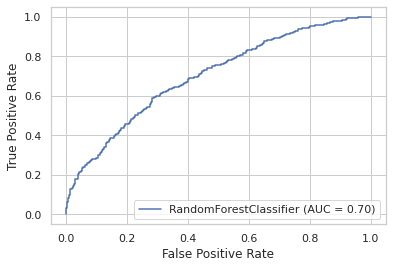

In [ ]:
from imblearn.over_sampling import SMOTE
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99, stratify=y)

#Scaling the training data and test data independently
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Oversampling the training dataset only
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

rf2 = RandomForestClassifier(criterion="gini", max_depth=13, n_estimators= 155)
rf2.fit(X_train, y_train)

# Predict labels of test set
y_pred = rf2.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plot_roc_curve(rf2, X_test, y_test) 
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  rf2.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = rf2.predict(X_test)

  # Compute and print metrics
  y_score = rf2.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6851400785554428
ROC_AUC: 0.7189950176315325
ROC_AUC: 0.6723231379034504
ROC_AUC: 0.6790072413617475
ROC_AUC: 0.7017949109734943
ROC_AUC: 0.6671070804758865
ROC_AUC: 0.7021364563765629
ROC_AUC: 0.7043115613118939
ROC_AUC: 0.6953654685613448
ROC_AUC: 0.7113971304194118
Mean roc_auc value for 10 random test datasets: 0.6937578083570768
Variance of roc_auc value for 10 random test datasets: 0.0002658376336316896


## 4.3 Balanced Prediction: Undersampling the majority class

In this section we perform Random Forest Classification on a balanced subset of the orginial imbalanced dataset. As mentioned before there are 969 loans represented in the original data set that defaulted. For this reason, we draw a sample of 969 observations from the 3823 non-default loans. Thus, we obtain a fully balanced dataset with a total of 1938 observations.

In contrast to Section 4.1 and 4.2, here training AND prediction are based on a balanced dataset. That's why we called this section Balanced Prediction.

X_under and y_under were defined once above in section 1.4

### 4.3.1 GridSearch for hyperparamter selection


In [ ]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = 99, stratify=y_under)

#Scaling the training data and test data independently
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Specify possible hyperparameters 
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[11, 12, 13, 14],
    "n_estimators": np.arange(100, 180, 5)
}
# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state=99, shuffle = True)
gs_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring="roc_auc", cv=cross_validation,  verbose=3, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train, y_train)

print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 175}


### 4.3.2 Testing/Prediction of the tuned model

We now fit our model with the tuned hyperparameters from 4.3.1.

The tuned model paramters are:

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 175}

---

Tested on 10 different random data splits, the worst AUC-score was **0.68** while the models best performance was **0.74**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           0       0.60      0.70      0.65       291
           1       0.64      0.54      0.58       291

    accuracy                           0.62       582
   macro avg       0.62      0.62      0.61       582
weighted avg       0.62      0.62      0.61       582

[[203  88]
 [135 156]]


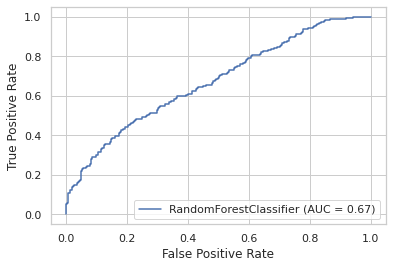

In [ ]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = 99, stratify=y_under)

rf3 = RandomForestClassifier(criterion="entropy", max_depth=11, n_estimators= 175)
rf3.fit(X_train, y_train)

# Predict labels of test set
y_pred = rf3.predict(X_test)

# Compute and print metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plot_roc_curve(rf3, X_test, y_test) 
plt.show() 

In [ ]:
from sklearn.metrics import roc_auc_score
score = np.zeros(10)
for i in range(0, 10):
  X_train, X_test, y_train, y_test = train_test_split(X,y_1d, test_size = 0.3, random_state = i, stratify=y_1d)

  # Fit to training set
  rf3.fit(X_train, y_train)

  # Predict labels of test set
  y_pred = rf3.predict(X_test)

  # Compute and print metrics
  y_score = rf3.predict_proba(X_test)[:,1]
  score[i] = roc_auc_score(y_test, y_score)
  print("ROC_AUC: {}".format(score[i]))
  
print("Mean roc_auc value for 10 random test datasets: {}".format(np.mean(score)))
print("Variance of roc_auc value for 10 random test datasets: {}".format(np.var(score)))

ROC_AUC: 0.6918211860014322
ROC_AUC: 0.7316232095081446
ROC_AUC: 0.6874320279707709
ROC_AUC: 0.6800408656078759
ROC_AUC: 0.7188691851146125
ROC_AUC: 0.6717329234788496
ROC_AUC: 0.7088385359087054
ROC_AUC: 0.7252147391821486
ROC_AUC: 0.6884536681676687
ROC_AUC: 0.7225512842406756
Mean roc_auc value for 10 random test datasets: 0.7026577625180884
Variance of roc_auc value for 10 random test datasets: 0.00040634590792653713


# 5. Conclusion

In general, unfortunately, we could not achieve the performance of the paper "Default Prediction of Commercial Real Estate Properties Using Machine Learning Techniques" by Cowden, C., Fabozzi, F., J. and Nazemi, A. (2019). In our opinion, the main problem is the unbalanced dataset. Nevertheless, we cannot explain in particular the bad performance of support vector machines and random forests, since these models tend to cope better with unbalanced data. We have tried many different approaches which, according to Mr. Nazemi and numerous tutorials from the Internet, should lead to much better results. Unfortunately, we could not improve the performance significantly. 

In the following table we are going to compare the prediction power of our three ML models with the three different approaches to handle the dataset imbalance.
We use four performance measures for evaluation: Precision, Recall, F1-Score and the Area under the ROC-Curve (AUC).

The recall and the AUC-score are the most informative metrics with regard to the imbalanced dataset.



In [ ]:
#@title
%%HTML
<!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">

<!-- jQuery library -->
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>

<!-- Popper JS -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.16.0/umd/popper.min.js"></script>

<!-- Latest compiled JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>


</style>
<table class="table table-bordered table-hover table-sm"> 
  <thead class="thead-dark">
    <tr>
      <th rowspan="2" class="text-center center align-middle">Metrics/Models</th>
      <th colspan="3" class="text-center">Logistic Regression</th>
      <th colspan="3" class="text-center">Support Vector Machine</th>
      <th colspan="3" class="text-center">Random Forest</th>
    </tr>
    <tr>
      <th class="text-center">imbalanced</th>
      <th class="text-center">SMOTE</th>
      <th class="text-center">undersampled</th>
      <th class="text-center">imbalanced</th>
      <th class="text-center">SMOTE</th>
      <th class="text-center">undersampled</th>
      <th class="text-center">imbalanced</th>
      <th class="text-center">SMOTE</th>
      <th class="text-center">undersampled</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th  class="table-dark text-center">Precision</th>

      <td class="text-center">0.59</td>
      <td class="text-center">0.60</td>
      <td class="text-center">0.62</td>
      
      <td class="text-center">0.59</td>
      <td class="text-center">0.60</td>
      <td class="text-center">0.61</td>
      
      <td class="text-center">0.60</td>
      <td class="text-center">0.59</td>
      <td class="text-center">0.62</td>
    </tr>
    <tr>
      <th  class="table-dark  text-center">Recall</th>

      <td class="text-center">0.64</td>
      <td class="text-center">0.66</td>
      <td class="text-center">0.62</td>
      
      <td class="text-center">0.64</td>
      <td class="text-center">0.65</td>
      <td class="text-center">0.61</td>
      
      <td class="text-center">0.59</td>
      <td class="text-center">0.63</td>
      <td class="text-center">0.62</td>
    </tr>
    <tr>
      <th  class="table-dark  text-center" >F1-Score</th>

      <td class="text-center">0.56</td>
      <td class="text-center">0.58</td>
      <td class="text-center">0.61</td>
      
      <td class="text-center">0.55</td>
      <td class="text-center">0.56</td>
      <td class="text-center">0.60</td>
      
      <td class="text-center">0.60</td>
      <td class="text-center">0.59</td>
      <td class="text-center">0.61</td>
    </tr>
    <tr>
      <th  class="table-dark text-center">AUC</th>

      <td class="text-center">0.67</td>
      <td class="text-center">0.67</td>
      <td class="text-center">0.65</td>
      
      <td class="text-center">0.68</td>
      <td class="text-center">0.70</td>
      <td class="text-center">0.67</td>
      
      <td class="text-center">0.69</td>
      <td class="text-center">0.69</td>
      <td class="text-center">0.70</td>
    </tr>
  </tbody>
</table>

## 5.1 Logistic Regression
The performance of the **weigted logistic regression** is identical to the one obtained by **oversampling using SMOTE**. Based on recall and AUC these two approaches **slightly outperform the third one**.
The third approach which uses the undersampled balanced dataset achieves a higher precision score and therefore a higher F1-Score. 



## 5.2 Support Vector Machines
According to the AUC score and recall, the approach with **SMOTE oversampling would be selected**, since it has an AUC score of 0.7 and a recall of 0.65. As with logistic regression, the F1 score is higher with undersampling because the precision has a higher value due to the balance of the data set. 

## 5.3 Random Forest
Again considering the recall and the AUC score as the most relevant metrics, we find that all three approaches are more or less equally successful in predicting deafulted loans with recall scores of 0.59-0.62 and AUC scores from 0.69-0.70.
Nevertheless, the approach with **SMOTE oversampling or undersampling should be preferred** as their recall scores are significantly higher than the recall score of 0.59 of the model without resampled data.
In total the **undersampling approach should be selected as it beats the SMOTE approach in terms of precision** and performs otherwise equally well. 

## 5.4 Model recommendation
To summarize the results above, we find that the **best model** for our application is the **random forest classifier using the undersampling approach**. In general, **SMOTE seems to be a good approach** to handle class imbalance. Particulary the recall which tells us how many of the defaulted loans are detected improved when using SMOTE oversampling.  